In [1]:
import sys
import time

sys.path.append("..")
import uniplot as up
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import solv_fzcp as sfzcp
import uvarprob as uvpr

In [2]:
test_file = "../tst1.csv"

In [3]:
# Maximal number of steps
max_steps = 1e6
# Tolerance
epsilon = 1e-2
# If True - global Lipschitz constant is used
global_lipschitz_interval = True
# If True - the record value is taken from the test database
known_record = False
# How many points to skip in vizualization - regular step
skip = 1000
# The size of the legend in plots
legend_size = 2

In [4]:
def read_problems(fname):
    data = pd.read_csv(fname, index_col='name', comment='#')
    return data

In [5]:
df = read_problems(test_file)
df

,objective,a,b,min_f,min_x
name,,,,,
benchmark2,x^3+2.*x+cos(10.*x),-3,3,0,0
benchmark,1./(7.26231 * (10. * x - 1.34364)^2 + 0.25275)...,0,1,0,0


In [6]:
points_db = {}
psl_lipint_points_list = []
psl_lip_points_list = []
psqe_lipint_points_list = []
psqe_lip_points_list = []
bnb2_lipint_points_list = []
bnb2_lip_points_list = []

In [7]:
def log_point(x, points_list):
    points_list.append(x)

In [8]:
for test in df.itertuples():
    print(test.Index)
    points_db[test.Index] = {'psl_lipint_points_list': [], 'psl_lip_points_list': [], 'psqe_lipint_points_list': [],
                             'psqe_lip_points_list': [], 'bnb2_pslint_points_list': [],'bnb2_psl_points_list':[],'bnb2_lipint_points_list': [],
                             'bnb2_lip_points_list': []}
    #     print(points_db)

    # prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x,
    #                           lambda x: log_point(x, points_db[test.Index]['psl_lipint_points_list']))
    # print(sfzcp.psl(prob, sym=False, epsilon=1e-5))
    # prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x,
    #                           lambda x: log_point(x, points_db[test.Index]['psl_lip_points_list']))
    # print(sfzcp.psl(prob, sym=True, epsilon=1e-5))
    # prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x,
    #                           lambda x: log_point(x, points_db[test.Index]['psqe_lipint_points_list']))
    # print(sfzcp.psqe(prob, sym=False, epsilon=1e-5))
    # prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x,
    #                           lambda x: log_point(x, points_db[test.Index]['psqe_lip_points_list']))
    # print(sfzcp.psqe(prob, sym=True, epsilon=1e-5))
    prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x,
                              lambda x: log_point(x, points_db[test.Index]['bnb2_pslint_points_list']))
    print(sfzcp.new_method(prob, symm=False, epsilon=1e-5, estimator=1))

    prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x,
                              lambda x: log_point(x, points_db[test.Index]['bnb2_psl_points_list']))
    print(sfzcp.new_method(prob, symm=True, epsilon=1e-5, estimator=1))
    prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x,
                              lambda x: log_point(x, points_db[test.Index]['bnb2_lipint_points_list']))
    print(sfzcp.new_method(prob, symm=False, epsilon=1e-5, estimator=2))
    prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x,
                              lambda x: log_point(x, points_db[test.Index]['bnb2_lip_points_list']))
    print(sfzcp.new_method(prob, symm=True, epsilon=1e-5, estimator=2))

benchmark2
TestResult(nsteps=37, first_crossing_zero_point=-0.130453313797082)
TestResult(nsteps=54, first_crossing_zero_point=-0.130453313797082)
TestResult(nsteps=7, first_crossing_zero_point=-0.130453438877509)
TestResult(nsteps=7, first_crossing_zero_point=-0.130453438877509)
benchmark
TestResult(nsteps=10605, first_crossing_zero_point=0.19468519542305568)
TestResult(nsteps=13782, first_crossing_zero_point=0.1946860981933718)
TestResult(nsteps=2231, first_crossing_zero_point=0.19468893071218105)
TestResult(nsteps=2934, first_crossing_zero_point=0.19469159687619303)


In [9]:
def vis_trials(points_list, num_series, base_level):
    poix = np.array(list(set(points_list[::skip])))
    poiy = np.full(len(poix), base_level + num_series * -0.5)
    up.plot_points(poix, poiy, num_series)

Pandas(Index='benchmark2', objective='x^3+2.*x+cos(10.*x)', a=-3, b=3, min_f=0, min_x=0)


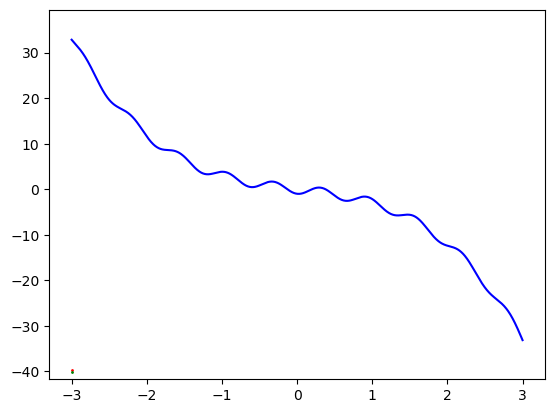

Pandas(Index='benchmark', objective='1./(7.26231 * (10. * x - 1.34364)^2 + 0.25275) + 1./(3.96356 * (10. * x - 2.55069)^2 + 0.1899) + 1./(6.64323 * (10. * x - 6.51593)^2 + 0.11877) + 1./(7.13707 * (10. * x - 0.28347)^2 + 0.18655) + 1./(1.00844 * (10. * x - 7.6228)^2 + 0.18908) + 1./(2.12438 * (10. * x - 7.2154)^2 + 0.28905) + 1./(1.1261 * (10. * x - 9.01427)^2 + 0.10509) + 1./(8.2846 * (10. * x - 5.41412)^2 + 0.17624) + 1./(3.4012 * (10. * x - 2.16599)^2 + 0.10581) + 1./(3.51853 * (10. * x - 2.21692)^2 + 0.19916)-7', a=0, b=1, min_f=0, min_x=0)


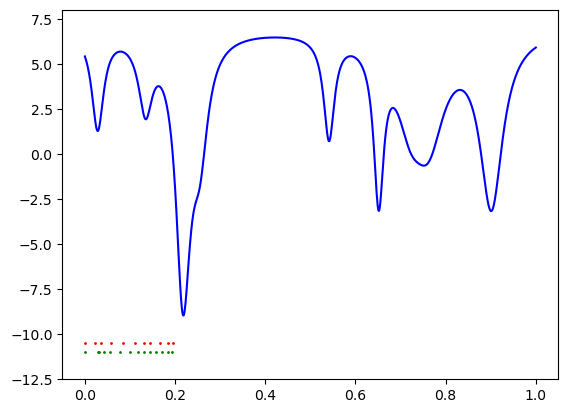

In [10]:
for test in df.itertuples():
    print(test)
    prob = uvpr.UniVarProblem(test.Index, test.objective, test.a, test.b, test.min_f, test.min_x)
    up.plot_problem(prob, {'function': 'b-'}, legend=legend_size)
    vis_trials(points_db[test.Index]['bnb2_lipint_points_list'], 0, plt.ylim()[0] + legend_size)
    vis_trials(points_db[test.Index]['bnb2_lip_points_list'], 1, plt.ylim()[0] + legend_size)
    vis_trials(points_db[test.Index]['psqe_lipint_points_list'], 2, plt.ylim()[0] + legend_size)
    vis_trials(points_db[test.Index]['psqe_lip_points_list'], 3, plt.ylim()[0] + legend_size)
    # vis_trials(points_db[test.Index]['psl_lipint_points_list'], 4, plt.ylim()[0] + legend_size)
    # vis_trials(points_db[test.Index]['psl_lip_points_list'], 5, plt.ylim()[0] + legend_size)
    #     print("ylim = ", plt.ylim()[0])
    plt.show()
